In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
np.random.seed(42)
n = 1500

In [3]:
data = {
    "age": np.random.randint(21, 65, n),
    "income": np.random.randint(20000, 150000, n),
    "loan_amount": np.random.randint(5000, 50000, n),
    "credit_score": np.random.randint(300, 850, n),
    "employment_years": np.random.randint(0, 40, n),
    "marital_status": np.random.choice(["Single", "Married"], n),
    "education": np.random.choice(["Graduate", "Undergraduate"], n),
    "home_ownership": np.random.choice(["Rent", "Own"], n),
    "loan_purpose": np.random.choice(["Personal", "Education", "Business"], n)
}

In [4]:
df=pd.DataFrame(data)
df

,age,income,loan_amount,credit_score,employment_years,marital_status,education,home_ownership,loan_purpose
0,59,37602,34739,735,24,Married,Graduate,Rent,Education
1,49,123320,48285,410,20,Married,Graduate,Rent,Personal
2,35,108801,8754,452,15,Single,Undergraduate,Rent,Business
3,63,45931,32044,401,30,Single,Undergraduate,Own,Personal
4,28,114377,6724,490,13,Married,Undergraduate,Own,Personal
...,...,...,...,...,...,...,...,...,...
1495,61,64638,14168,321,25,Single,Undergraduate,Own,Education
1496,23,111598,8551,749,6,Married,Graduate,Rent,Personal
1497,48,122386,17297,471,37,Married,Graduate,Own,Personal
1498,49,66486,48733,682,4,Single,Graduate,Rent,Education


In [5]:
# target logic (realistic)
df["default"] = (
    (df["credit_score"] < 550) |
    (df["loan_amount"] > df["income"] * 0.6)
).astype(int)

df.head()

,age,income,loan_amount,credit_score,employment_years,marital_status,education,home_ownership,loan_purpose,default
0,59,37602,34739,735,24,Married,Graduate,Rent,Education,1
1,49,123320,48285,410,20,Married,Graduate,Rent,Personal,1
2,35,108801,8754,452,15,Single,Undergraduate,Rent,Business,1
3,63,45931,32044,401,30,Single,Undergraduate,Own,Personal,1
4,28,114377,6724,490,13,Married,Undergraduate,Own,Personal,1


In [6]:
df["default"].value_counts()

,count
default,
1,831
0,669


In [7]:
df.shape

(1500, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               1500 non-null   int64 
 1   income            1500 non-null   int64 
 2   loan_amount       1500 non-null   int64 
 3   credit_score      1500 non-null   int64 
 4   employment_years  1500 non-null   int64 
 5   marital_status    1500 non-null   object
 6   education         1500 non-null   object
 7   home_ownership    1500 non-null   object
 8   loan_purpose      1500 non-null   object
 9   default           1500 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 117.3+ KB


In [9]:
df.size

15000

In [10]:
df.loan_purpose.value_counts()

,count
loan_purpose,
Business,523
Personal,508
Education,469


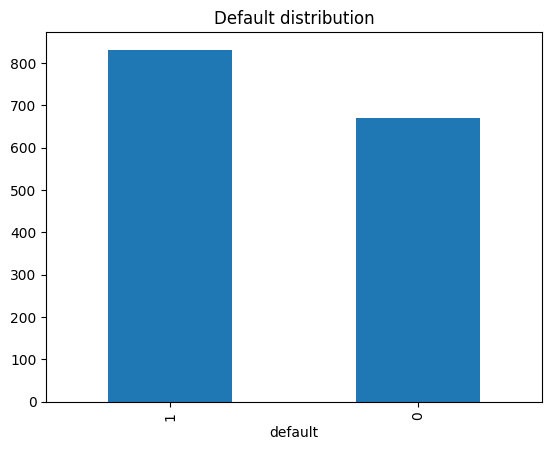

In [11]:
df["default"].value_counts().plot(kind="bar")
plt.title("Default distribution")
plt.show()

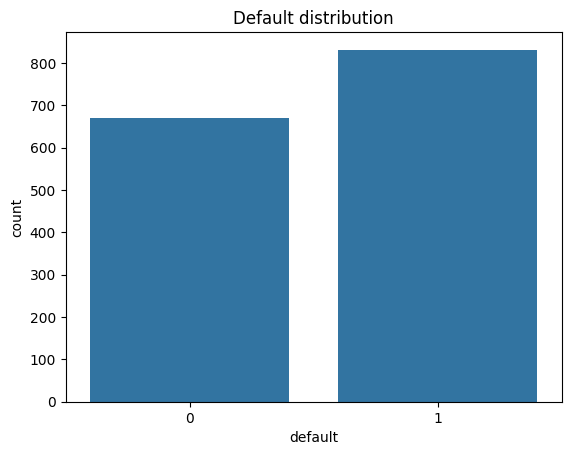

In [12]:
sns.countplot(data=df, x="default")
plt.title("Default distribution")
plt.show()

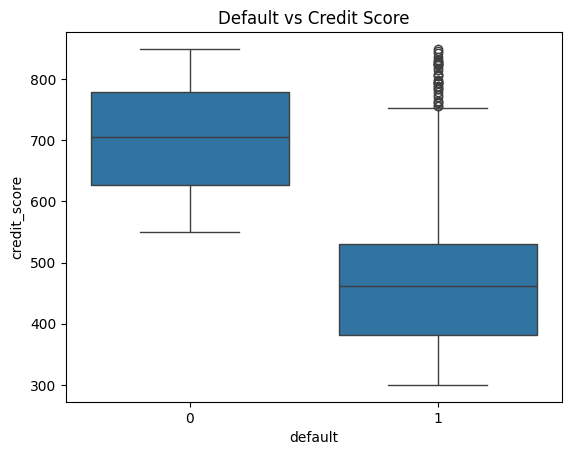

In [13]:
sns.boxplot(data=df,x="default",y="credit_score")
plt.title("Default vs Credit Score")
plt.show()

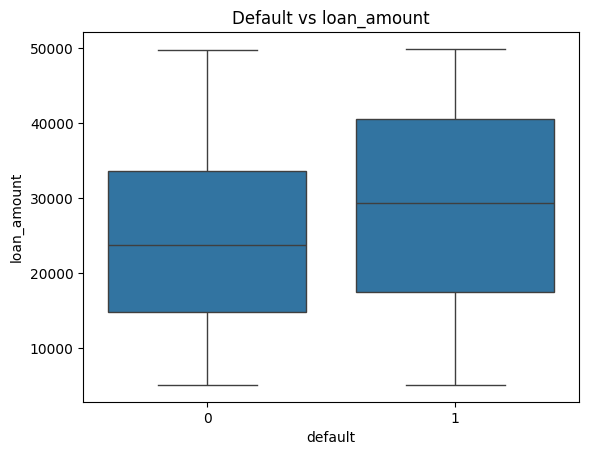

In [14]:
sns.boxplot(data=df,x="default",y="loan_amount")
plt.title("Default vs loan_amount")
plt.show()

In [15]:
x=df.drop("default",axis=1)
y=df["default"]

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler

num_cols = ["age", "income", "loan_amount", "credit_score", "employment_years"]
cat_cols = ["marital_status", "education", "home_ownership", "loan_purpose"]


preprocess=ColumnTransformer(transformers=[("num",StandardScaler(),num_cols),
                                           ("cat",OneHotEncoder(),cat_cols)])

preprocess

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['age', 'income', 'loan_amount',
                                  'credit_score', 'employment_years']),
                                ('cat', OneHotEncoder(),
                                 ['marital_status', 'education',
                                  'home_ownership', 'loan_purpose'])])

In [17]:
#train test split

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1200, 9), (300, 9), (1200,), (300,))

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [19]:
from sklearn import pipeline
model=Pipeline(steps=[("preprocess",preprocess),
                      ("rf",RandomForestClassifier(n_estimators=300,criterion="entropy",max_depth=6,random_state=2))])
model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'income',
                                                   'loan_amount',
                                                   'credit_score',
                                                   'employment_years']),
                                                 ('cat', OneHotEncoder(),
                                                  ['marital_status',
                                                   'education',
                                                   'home_ownership',
                                                   'loan_purpose'])])),
                ('rf',
                 RandomForestClassifier(criterion='entropy', max_depth=6,
                                        n_estimators=300, random_state=2))])

In [20]:
model.fit(x_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'income',
                                                   'loan_amount',
                                                   'credit_score',
                                                   'employment_years']),
                                                 ('cat', OneHotEncoder(),
                                                  ['marital_status',
                                                   'education',
                                                   'home_ownership',
                                                   'loan_purpose'])])),
                ('rf',
                 RandomForestClassifier(criterion='entropy', max_depth=6,
                                        n_estimators=300, random_state=2))])

In [21]:
prd=model.predict(x_test)
prd

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0])

In [22]:
accuracy_score(y_test,prd)

0.98

In [24]:
print(classification_report(y_test,prd))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       139
           1       1.00      0.96      0.98       161

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



In [25]:
confusion_matrix(y_test,prd)

array([[139,   0],
       [  6, 155]])

In [28]:
imp_features=model.named_steps["rf"].feature_importances_
imp_features

array([0.02208965, 0.15305191, 0.09368137, 0.67829131, 0.0255925 ,
       0.00340144, 0.00255465, 0.00303931, 0.00301986, 0.00350412,
       0.00353873, 0.00234629, 0.00290699, 0.00298187])